In [1]:
from requests_html import AsyncHTMLSession as asy
import pandas as pd 
import numpy as np
from IPython.display import Image

# starting the session

In [2]:
session = asy()

In [3]:
r = await session.get("https://www.perfumedubai.com/brands/gucci/")
r.status_code

200

# Extracting different tags from HTML page

In [4]:
divs = r.html.find("div")
p = r.html.find("p")
list_items = r.html.find("li")
links = r.html.find("a")
urls = r.html.absolute_links

In [5]:
len(urls)

97

# Extracting Java Scripts from HTML page

In [6]:
await r.html.arender(timeout=50 , scrolldown=True)

In [7]:
n_divs = r.html.find("div")
n_p = r.html.find("p")
n_list_items = r.html.find("li")
n_links = r.html.find("a")
n_urls = r.html.absolute_links

# Comparing old tags and tags with Java Scripts

In [8]:
len(divs) , len(n_divs)

(229, 251)

In [9]:
len(urls) , len(n_urls)

(97, 98)

In [10]:
len(list_items) , len(n_list_items)

(87, 93)

# Extracting links from anchor tag

In [11]:
links =[a for a in r.html.find("a.pname" )]
links

[<Element 'a' href='https://www.perfumedubai.com/gucci-bamboo-edp-75ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-acqua-di-fiori-w-edt-50ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-acqua-di-fiori-edt-100ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-aqua-fiori-edt-50ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-edp-100ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-nattare-di-fiori-edp-intense-50ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-nettare-di-fiori-edp-intense-100ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-bloom-nettare-di-fiori-w-edp-100ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-by-gucci-w-edp-75ml/' class=('pname',)>,
 <Element 'a' href='https://www.perfumedubai.com/gucci-flor

# Extracting names of products from HTML page

In [12]:
productname = [a.text for a in r.html.find("li div a.pname")]
len(productname)
productname[15:]

['Gucci Guilty Intense for Women EDP 75ml',
 'Gucci Guilty Pour Homme Absolute EDP 90ml',
 'Gucci Guilty Pour Homme EDT 90ml',
 'Gucci Made To Measure EDT 90ml',
 "Gucci Memoire D'Une Odeur Edp (W) 100ml"]

# Extracting sales price

In [13]:
salePrice = [a.text for a in r.html.find("span.SalePrice")]
salePrice
len(salePrice)

18

# Extracting retail price

In [14]:
retailprice = [a.text for a in r.html.find("strike.RetailPriceValue")]
retailprice
len(retailprice)

20

# Moving extracted data to Pandas Dataframe

In [15]:
df = pd.DataFrame()

In [16]:
df["productname"] = productname
df["retailprice"] = retailprice
#df["RP AED"] = np.multiply( df["retailprice"] , 3.67)
#df["sale_price"] = price

In [17]:
df["retailprice"] = pd.to_numeric(df.retailprice.replace({'\$': '', ',': ''}, regex=True))
df["RP_AED"] = round(df.retailprice * 3.67,0)
df.head()

,productname,retailprice,RP_AED
0,Gucci Bamboo EDP 75ml,156.0,573.0
1,Gucci Bloom Acqua Di Fiori (W) Edt 50ml,101.0,371.0
2,Gucci Bloom Acqua Di Fiori EDT 100ml,147.0,539.0
3,Gucci Bloom Aqua Fiori EDT 50ml,101.0,371.0
4,Gucci Bloom EDP 100ml,156.0,573.0


# Performing loop using zip

In [18]:
productname = [(a.text , b.text , c.text) for a , b , c in zip(r.html.find("a.pname") , r.html.find("span.SalePrice") , r.html.find("strike.RetailPriceValue"))]

In [19]:
len(productname)
dft = pd.DataFrame(productname , columns=["productname" , "salePrice" , "retailprice" ])
dft.head()

,productname,salePrice,retailprice
0,Gucci Bamboo EDP 75ml,$79.00,$156.00
1,Gucci Bloom Acqua Di Fiori (W) Edt 50ml,$62.00,$101.00
2,Gucci Bloom Acqua Di Fiori EDT 100ml,$89.00,$147.00
3,Gucci Bloom Aqua Fiori EDT 50ml,$62.00,$101.00
4,Gucci Bloom EDP 100ml,$99.00,$156.00


# issue of sales price missing values

In [21]:
finalvalue = pd.merge(df , dft[["productname" , "salePrice"]] , left_on= "productname" , right_on= "productname" , how = "left")
finalvalue

,productname,retailprice,RP_AED,salePrice
0,Gucci Bamboo EDP 75ml,156.0,573.0,$79.00
1,Gucci Bloom Acqua Di Fiori (W) Edt 50ml,101.0,371.0,$62.00
2,Gucci Bloom Acqua Di Fiori EDT 100ml,147.0,539.0,$89.00
3,Gucci Bloom Aqua Fiori EDT 50ml,101.0,371.0,$62.00
4,Gucci Bloom EDP 100ml,156.0,573.0,$99.00
5,Gucci Bloom Nattare Di Fiori EDP Intense 50ml,160.0,587.0,$79.00
6,Gucci Bloom Nettare Di Fiori EDP Intense 100ml,140.0,514.0,$105.00
7,Gucci Bloom Nettare Di Fiori W Edp 100ml,163.0,598.0,$89.00
8,Gucci By Gucci (W) Edp 75ml,136.0,499.0,$85.00
9,Gucci Flora EDP 75ml,135.0,495.0,$89.00


# problem as sales price is sometimes under "span" tag and some times under  "em" tag

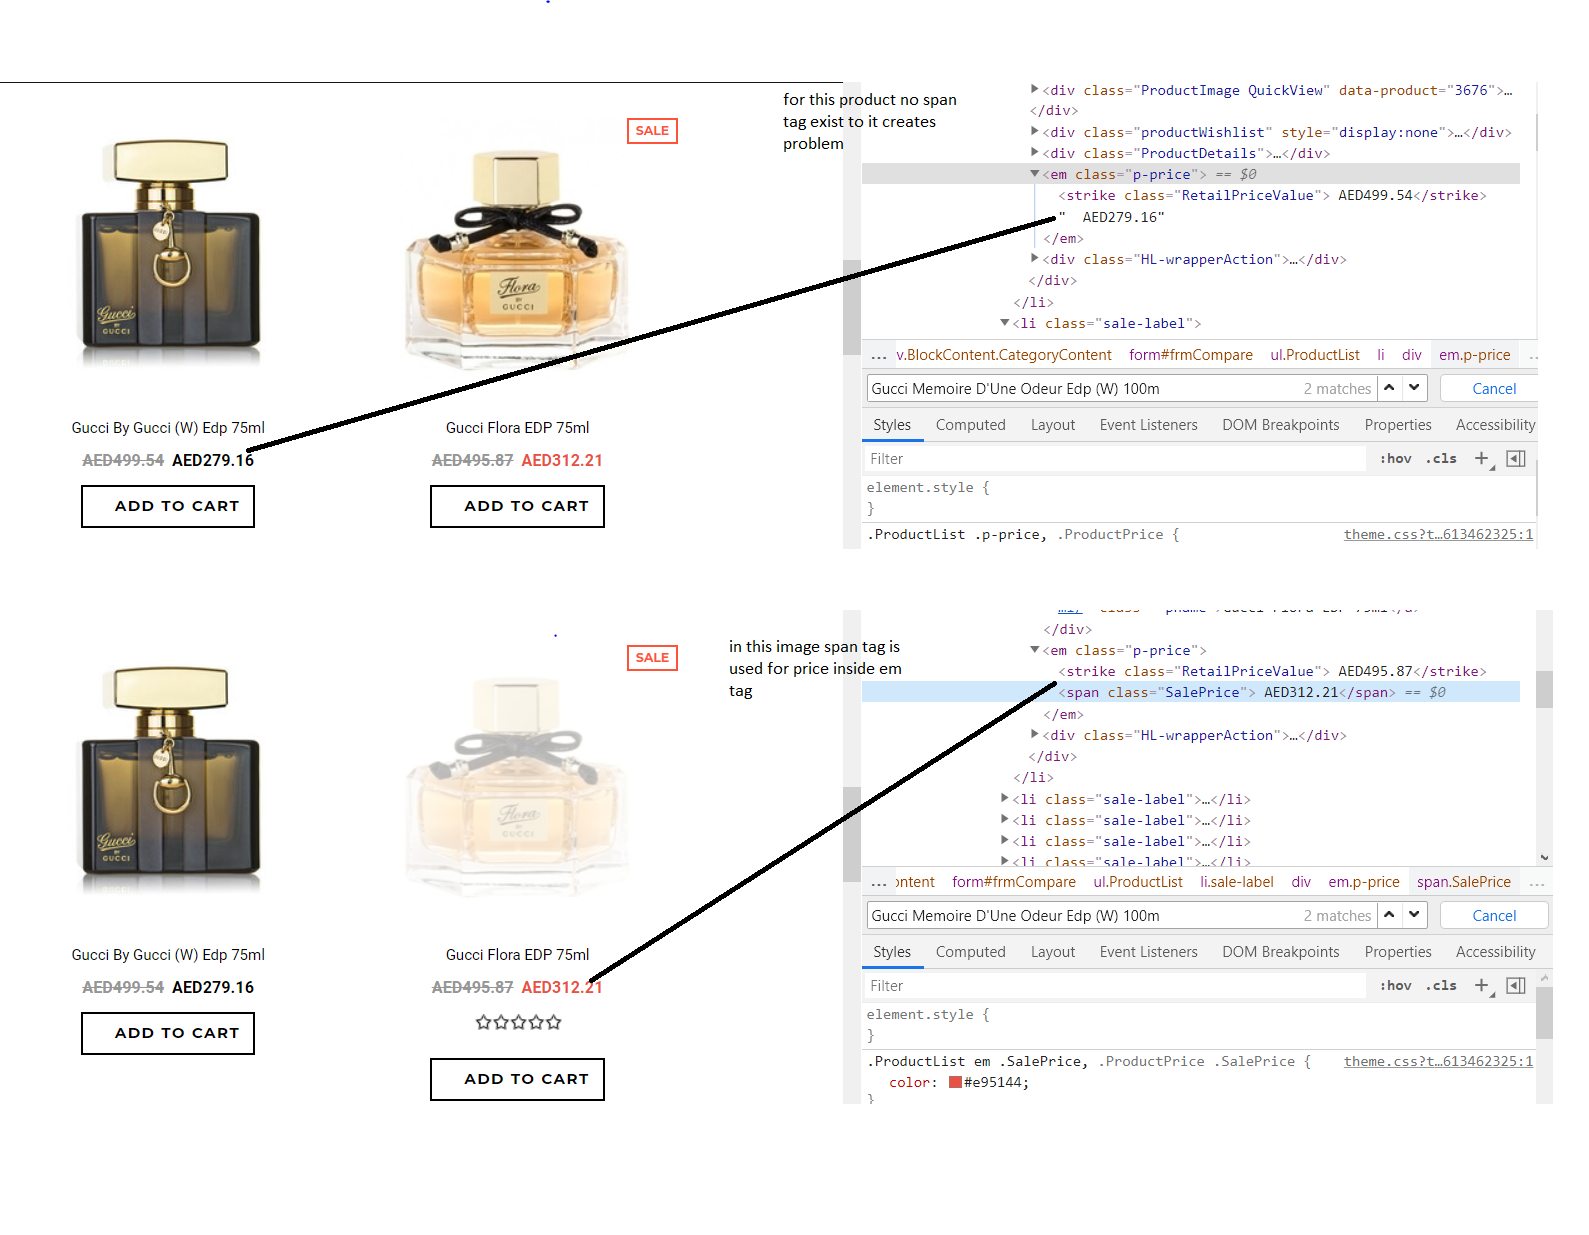

In [22]:
Image(filename = "problem.png", width=800, height=800)

# Testing to extact the correct sales price

In [23]:
test = [a.text for a in r.html.find("li em")]
test[15:]

['$130.00\n$67.00',
 '$127.00\n$85.00',
 '$110.00\n$75.00',
 '$105.00\n$69.00',
 '$148.00\n$108.00']

In [24]:
salePrice = [a.text[a.text.find("\n$")+2:] for a in r.html.find("li em")]
salePrice[15:]

['67.00', '85.00', '75.00', '69.00', '108.00']

In [25]:
a = '$156.00\n$79.00'

In [26]:
pd.to_numeric(a[a.find("\n$")+2:])

79.0

# Performing looping again to extract the data

In [27]:
ProductDetails = [(a.text , (b.text[b.text.find("\n$")+2:]) , c.text) 
                  
                  for a , b , c in zip(r.html.find("a.pname") , r.html.find("li em") , r.html.find("strike.RetailPriceValue"))]
ProductDetails[15:]

[('Gucci Guilty Intense for Women EDP 75ml', '67.00', '$130.00'),
 ('Gucci Guilty Pour Homme Absolute EDP 90ml', '85.00', '$127.00'),
 ('Gucci Guilty Pour Homme EDT 90ml', '75.00', '$110.00'),
 ('Gucci Made To Measure EDT 90ml', '69.00', '$105.00'),
 ("Gucci Memoire D'Une Odeur Edp (W) 100ml", '108.00', '$148.00')]

In [28]:
data = pd.DataFrame(ProductDetails , columns=["ProdName" , "SalePrice" , "RetailPrice"] )
data.dtypes

ProdName       object
SalePrice      object
RetailPrice    object
dtype: object

# Correcting the data type

In [29]:
#data["SalePrice"] = pd.to_numeric(data["SalePrice"])
data["RetailPrice"] = pd.to_numeric(data["RetailPrice"].replace({'\$': ''}, regex=True))
data["SalePrice"] = pd.to_numeric(data["SalePrice"])
data["ProdName"] = data["ProdName"].astype(str)

In [30]:
data

,ProdName,SalePrice,RetailPrice
0,Gucci Bamboo EDP 75ml,79.0,156.0
1,Gucci Bloom Acqua Di Fiori (W) Edt 50ml,62.0,101.0
2,Gucci Bloom Acqua Di Fiori EDT 100ml,89.0,147.0
3,Gucci Bloom Aqua Fiori EDT 50ml,62.0,101.0
4,Gucci Bloom EDP 100ml,99.0,156.0
5,Gucci Bloom Nattare Di Fiori EDP Intense 50ml,79.0,160.0
6,Gucci Bloom Nettare Di Fiori EDP Intense 100ml,105.0,140.0
7,Gucci Bloom Nettare Di Fiori W Edp 100ml,89.0,163.0
8,Gucci By Gucci (W) Edp 75ml,76.0,136.0
9,Gucci Flora EDP 75ml,85.0,135.0


In [31]:
dataAED = data

# Converting Values to AED

In [32]:
dataAED["SalePrice"] = round(np.multiply(dataAED["SalePrice"] , 3.67) , 0)
dataAED["RetailPrice"] = round(np.multiply(dataAED["RetailPrice"] , 3.67) , 0)

In [33]:
dataAED

,ProdName,SalePrice,RetailPrice
0,Gucci Bamboo EDP 75ml,290.0,573.0
1,Gucci Bloom Acqua Di Fiori (W) Edt 50ml,228.0,371.0
2,Gucci Bloom Acqua Di Fiori EDT 100ml,327.0,539.0
3,Gucci Bloom Aqua Fiori EDT 50ml,228.0,371.0
4,Gucci Bloom EDP 100ml,363.0,573.0
5,Gucci Bloom Nattare Di Fiori EDP Intense 50ml,290.0,587.0
6,Gucci Bloom Nettare Di Fiori EDP Intense 100ml,385.0,514.0
7,Gucci Bloom Nettare Di Fiori W Edp 100ml,327.0,598.0
8,Gucci By Gucci (W) Edp 75ml,279.0,499.0
9,Gucci Flora EDP 75ml,312.0,495.0
